# Introduction to Python for Geoscientists

This is a "Jupyter Notebook". Formerly an IPython Notebook. It is a good way to document workflows and analysis pipelines. You can have Python, R, Fortran, Julia, etc notebooks. This is a "Markdown" cell, you can write notes, equations in latex style, $E=\kappa A ^m (\nabla z)^n$, or embed figures. 

Today we are using a Python kernel to do some cool stuff with Geoscience data. The following cell is your first Python code

In [1]:
2+4*10

42

In [2]:
#This is a comment. This is for a human to read (so you remember what your code does!)
#Python ignores anything behind the '#'.

#The next line is an example of a 'variable'. Assign values using a single '=' sign.
time=145

Note: A variable (e.g. time) must start with a letter or underscore, and can include a number

In [3]:
#Now you can use that variable in different ways.... firstly print it out to the screen
print("The age of the sample is", time, " Million years")

The age of the sample is 145  Million years


In [4]:
#Make a new variable called 'endtime' and add a constant to our 'time' variable
endtime=time+56

In [5]:
#Nothing printed out above? Good. Jupyter Notebooks won't always do that so let's tell Python to print it.
print(endtime)

201


In [6]:
#Make a new 'string' variable
geological_age='Jurassic'

#Print out some useful information that includes our different variables
print("My sample is ", endtime, " Million years old from the", geological_age, " age.")

My sample is  201  Million years old from the Jurassic  age.


In [7]:
#Make a Python List object, similar to an array.
times=[1,4.5,5+3.2,geological_age,"Another string",True]

print(times)

#There are many different types of data types and objects: 
#int, long, float, complex, NaN, logical, String, Lists, Tuple, Dictionary, functions, classes, etc

[1, 4.5, 8.2, 'Jurassic', 'Another string', True]


In [8]:
#indexing
print(times[0])

1


In [9]:
print(times[4])

Another string


In [10]:
print(times[4][0])

A


### Functions
These are bits of code you want to perhaps use many times, or keep self contained, or refer to at different points. They can take values as input and give values back (or not). 

In [11]:
#Declare the name of the function
def add_numbers(x,y):
    '''adds two numbers
    usage: myaddition=addnumbers(x,y)
    returns: z
    inputs: x,y
    x and y are two integers
    z is the summation of x and y
    '''
    
    z=x+y
    
    return(z)

Note the indentation - Python forces your code to be nicely readable by using 'whitespace'/indentation to signify what chunks of code are related. You will see this more later.
    
Many functions have a header - formatted as a multiline comment with three '''. This hopefully will tell you about the function

Anyway, let's run our function, now that we have initialised it!

In [12]:
add_numbers(1,2)

3

### Loops, operators, conditions
Python is great for doing something a million times. It can be useful if you have many samples/datapoints and you want to operate or manipulate those points.

In [13]:
#Loop through our list 'times' that we defined above
for mything in times:
    print(mything)

1
4.5
8.2
Jurassic
Another string
True


Sometimes you need to loop through a list, but simultaneously keep track of which index you're up to.

In [14]:
for myindex, mything in enumerate(times):
    print("index:",myindex," The thing in my 'times' list:",mything)

index: 0  The thing in my 'times' list: 1
index: 1  The thing in my 'times' list: 4.5
index: 2  The thing in my 'times' list: 8.2
index: 3  The thing in my 'times' list: Jurassic
index: 4  The thing in my 'times' list: Another string
index: 5  The thing in my 'times' list: True


You don't always need a pre-defined list

In [42]:
age=140
# What is the value of "time" ?
# age < time is a "logical" data-type. It's either True or False
while age < time:
    print("time:", time, " age:", age, " difference:",time-age)
    age=age+1

time: 145  age: 140  difference: 5
time: 145  age: 141  difference: 4
time: 145  age: 142  difference: 3
time: 145  age: 143  difference: 2
time: 145  age: 144  difference: 1


#### Control statements

In [44]:
#Control statements: if, for, while, try, 
if time < 200:
    print(time)

145


In [17]:
if time <= 200:
    print(geological_age)
elif time > 200:
    print("Triassic age")
else:
    pass #This option is not necessarily needed, but can be useful in some scenarios

Jurassic


In [18]:
#Another function
def timescale(t):
    print(t)
    if (t <= 4500) & (t > 2500):
        return("Archean")

    elif (t <=2500) & (t > 541):
        return("Proterozoic")

    elif (t <= 541) & (t > 252):
        return("Palaeozoic")

    elif (t <=252) & (t > 65):
        return("Palaeozoic")

    elif (t <=65) & (t >= 0):
        return("Cenozoic")

    else:
        print ("Expect number between 0 and 4500, got:",t)
        return(float('nan'))

In [19]:
timescale(1)

1


'Cenozoic'

That is the basics. Now we are going to load in some data and manipulate it.

## Loading data

In [20]:
#First we have to load some modules to do the work for us.
#Modules are packages people have written so we do not have to re-invent everything!

#The first is NUMerical PYthon. A very popular matrix, math, array and data manipulation library.
import numpy

#Pandas is a module that is great for dealing with tables of data
import pandas

#This is a library for making figures (orignally based off Matlab plotting routines)
#We use the alias 'plt' because we don't want to type out the whole name everytime we reference it!
import matplotlib.pyplot as plt 

In [21]:
#Set the variable name for the file we are loading in. 
#It is in the 'data' directory, and the file is called EarthChemCU.txt. 
#We are currently working in /examples.
filename = '../data/EarthChemCU.txt'

#Now read in the data
# loadtxt() is a function that we can now use because we loaded the library called numpy
chemdata=numpy.loadtxt(filename, delimiter=',')
#chemdata <- the name of a variable we are making that will hold the table of data
#filename <- this is the name of the variable we declared above
#delimiter <- this is a csv file

### Want more details about a command/function we use?

In [22]:
#Try this help command
help(numpy.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence, optional
        The characters or list o

## Exploring your data
#### It is often a good idea to look at the data to have some idea of what you are working with

In [23]:
#What does the data look like. Print it out
print(chemdata)

[[  3.92583000e+01  -1.14992000e+02   1.11000000e+02   1.96000000e+04]
 [  3.92583000e+01  -1.14992000e+02   1.11000000e+02   1.57000000e+04]
 [  4.12060000e+01  -1.17272000e+02   1.05000000e+02   3.00000000e+00]
 ..., 
 [  2.00530000e+01   1.17419000e+02   0.00000000e+00   3.00000000e+01]
 [  2.00530000e+01   1.17419000e+02   0.00000000e+00   3.30000000e+01]
 [  2.00530000e+01   1.17419000e+02   0.00000000e+00   3.50000000e+01]]


In [24]:
#This is in the style: Latitude, Longitude(-180:180), Age(Ma), pp
#Print the dimensions of the data
print(chemdata.shape)

(207431, 4)


207431 rows! A good example for why we use Python and not something like Excel.

### Accessing data from an array
chemdata is a table of data: an array with two dimensions. So to access/look at/change parts of it, we need to specify both row and column

In [48]:
#Print the number in the first row and third column. 
#IMPORTANT: Python counts from 0
print(chemdata[0,2])

111.0


In [25]:
#Print the first row
print(chemdata[0,:])

[    39.2583   -114.992     111.      19600.    ]


In [26]:
#Print the third column
print(chemdata[:,2])

[ 111.  111.  105. ...,    0.    0.    0.]


In [27]:
#Print the first two columns for row id 2, 5 and 6. 
print(chemdata[[2,5,6],0:2])

[[  41.206 -117.272]
 [  41.186 -117.417]
 [  41.177 -117.485]]


## Plotting data
Now to make our first plot!

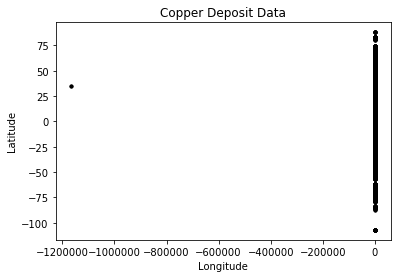

In [28]:
#Plot the lats and lons, i.e. the first column vs the second column
plt.plot(chemdata[:,1],chemdata[:,0],'k.')
plt.title('Copper Deposit Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

This does not look right... It is a messy dataset! This is not uncommon. 
Maybe the Lats/Lons are stored as Norhtings/Eastings for some samples. 
Maybe they are missing a decimal place.

Anyway, Python is a great tool to clean things up! Let's investigate further.

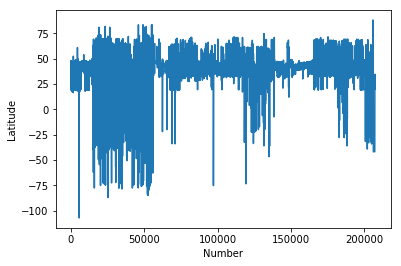

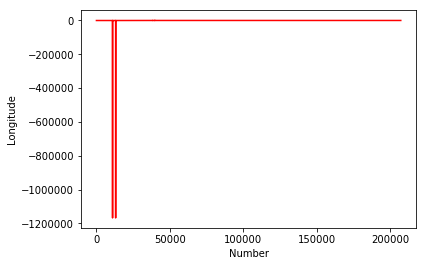

In [29]:
#Plot the Latitudes
plt.plot(chemdata[:,0])
plt.ylabel('Latitude')
plt.xlabel('Number')
plt.show()

#Plot the Longitudes
plt.plot(chemdata[:,1],'r')
plt.ylabel('Longitude')
plt.xlabel('Number')
plt.show()

There are definitely some outliers with latitudes and longitudes. So let's restrict just our points to range -180:180 and -90:90.

In [49]:
#Clean up the data, remove anything outside lat lon extent

#Find all the "chemdata" column 1 (i.e. longitude) data points that are greater than -180, save it in a new variable
where_longitude_above_min = chemdata[:,1]>-180
cudata=chemdata[where_longitude_above_min]
#Repeat for less than 180
where_longitude_below_max = cudata[:,1]<180
cudata2=cudata[where_longitude_below_max]

We can make that a litte clearer for the latitude values to see what is actually going on...

In [31]:
goodlat=cudata2[:,0]<90
print(goodlat)

[ True  True  True ...,  True  True  True]


In [32]:
goodlat.shape

(207422,)

In [33]:
cudata2

array([[  3.92583000e+01,  -1.14992000e+02,   1.11000000e+02,
          1.96000000e+04],
       [  3.92583000e+01,  -1.14992000e+02,   1.11000000e+02,
          1.57000000e+04],
       [  4.12060000e+01,  -1.17272000e+02,   1.05000000e+02,
          3.00000000e+00],
       ..., 
       [  2.00530000e+01,   1.17419000e+02,   0.00000000e+00,
          3.00000000e+01],
       [  2.00530000e+01,   1.17419000e+02,   0.00000000e+00,
          3.30000000e+01],
       [  2.00530000e+01,   1.17419000e+02,   0.00000000e+00,
          3.50000000e+01]])

In [34]:

#Repeat for latitudes less than 90
cudata3=cudata2[cudata2[:,0]<90]
#Repeat for greater than -90
cudata4=cudata3[cudata3[:,0]>-90]


print("We have removed", chemdata.shape[0]-cudata4.shape[0], "samples")

We have removed 47 samples


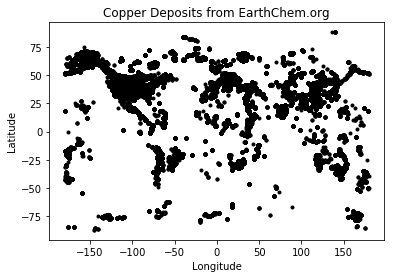

In [35]:
plt.plot(cudata4[:,1],cudata4[:,0],'k.')
plt.title('Copper Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()


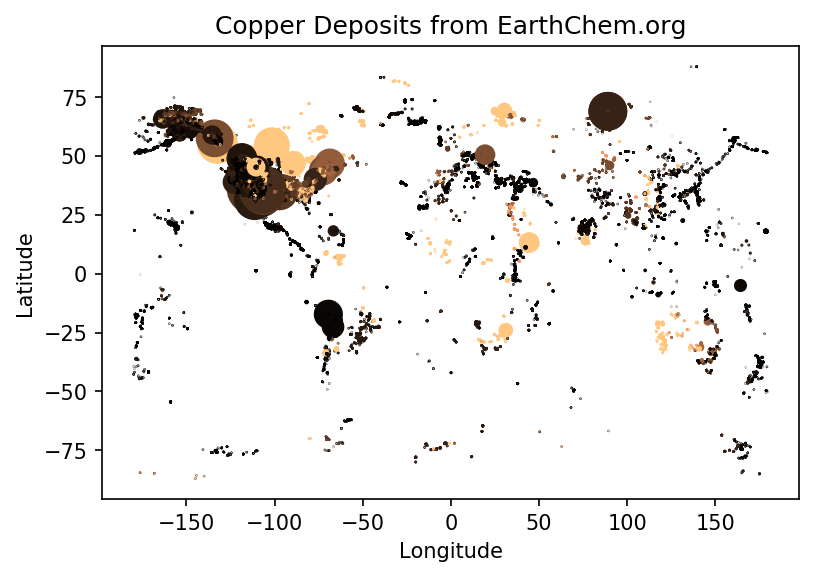

In [36]:
lats=cudata4[:,0]
longs=cudata4[:,1]
age=cudata4[:,3]
copper=cudata4[:,2]

#lats_rich=lats[copper>2]

fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(longs,lats,s=age/1000,c=copper,vmin=0, vmax=1000,cmap=plt.cm.copper)
plt.title('Copper Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [37]:
import numpy as np
def reject_outliers(data):
    m = 2
    u = np.mean(data)
    print("mean is:", u)
    s = np.std(data)
    print("std is:", s)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    print("removed:",np.shape(data)[0] - np.shape(filtered)[0])
    return filtered

In [38]:
filtered_age=reject_outliers(copper)

mean is: 557.079935289
std is: 961.774695444
removed: 20407


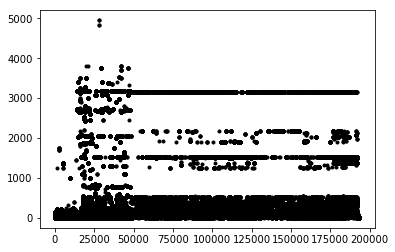

In [50]:
plt.plot(copper[copper>1],'k.')
plt.show()

### Let's make a nicer map

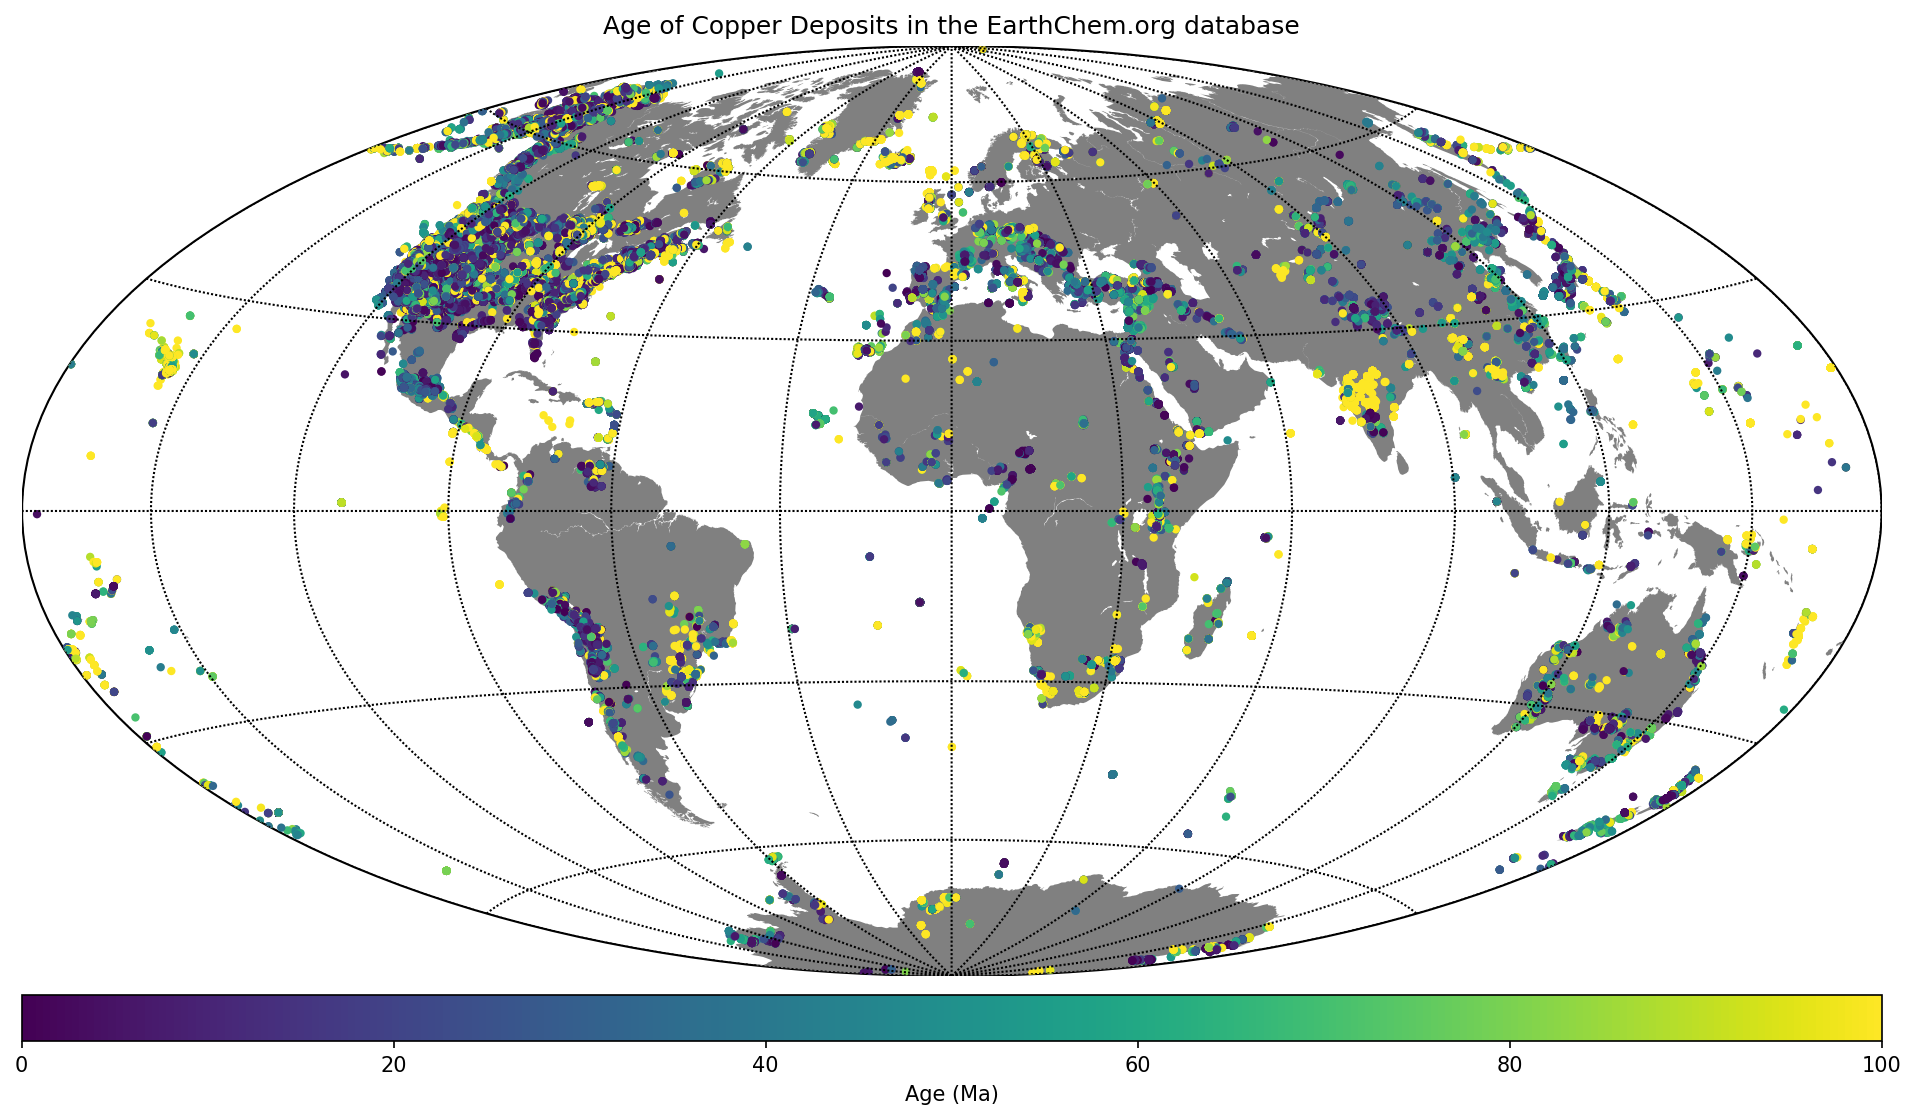

In [51]:
#Import another module called Basemap - great for plotting things on globes
from mpl_toolkits.basemap import Basemap
from sklearn import preprocessing

#Make new variables from our array (so it is easier to see what we are doing)
lats=cudata4[:,0]
longs=cudata4[:,1]
age=cudata4[:,3]

#######
## Make the figure
#######

#Create a figure object
fig = plt.figure(figsize=(16,12),dpi=150)

#Make the basemap, shade it and put down some other map symbols
pmap = Basemap(projection='hammer', lat_0=0, lon_0=0, #You can break loooong commands over multiple lines
           resolution='l')
pmap.drawmapboundary(fill_color='white')
pmap.fillcontinents(color='grey', lake_color='white', zorder=0)
pmap.drawmeridians(numpy.arange(0, 360, 30))
pmap.drawparallels(numpy.arange(-90, 90, 30))

#compute native map projection coordinates of lat/lon grid.
xh, yh = pmap(longs, lats)

#Make a scatter plot of the data coloured by age. Restrict the colour range between 0 and 2000
#And also set the 'plot' as a variable so we can reference it
mapscat = pmap.scatter(xh,yh,marker=".",c=age,vmin=0,vmax=100)

#Add a colourbar, 
cbar=pmap.colorbar(mapscat,location='bottom')
cbar.set_label('Age (Ma)')

# Add a map title, and tell the figure to appear on screen
plt.title('Age of Copper Deposits in the EarthChem.org database')
plt.show()